In [129]:
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [130]:
df = pd.read_csv('../train.csv')
print(df.shape)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [131]:
# df['season'] = df['season'].astype('category')
# df['holiday'] = df['holiday'].astype('category')
# df['workingday'] = df['workingday'].astype('category')
# df['weather'] = df['weather'].astype('category')
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['dayofweek'] = pd.DatetimeIndex(df['datetime']).dayofweek
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
df = df.drop('datetime', axis=1)
# df['month'] = df['month'].astype('category')
# df['day'] = df['day'].astype('category')
# df['dayofweek'] = df['dayofweek'].astype('category')
# df['hour'] = df['hour'].astype('category')
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
month           int32
day             int32
dayofweek       int32
hour            int32
dtype: object

In [132]:
y = df['count'].copy()
df = df.drop(['casual','registered','count'], axis=1)

In [133]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


In [134]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,dayofweek,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,6.521495,9.992559,3.013963,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,3.444365,5.476603,2.004577,6.915757
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,5.000000,1.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,7.000000,10.000000,3.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,10.000000,15.000000,5.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,12.000000,19.000000,6.000000,23.000000


In [135]:
df2 = df[['temp','atemp','humidity','windspeed']]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=7)
# scaler = preprocessing.MaxAbsScaler().fit(X_train)
# scaler = preprocessing.MinMaxScaler().fit(X_train)
# scaler = preprocessing.StandardScaler().fit(X_train)
# scaler = preprocessing.Normalizer().fit(X_train)
# scaler = preprocessing.RobustScaler().fit(X_train)
# scaler = preprocessing.KernelCenterer().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

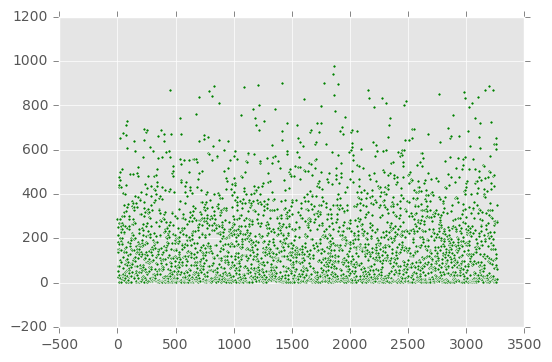

In [139]:
plt.scatter(X_test.reset_index(drop=True).index, y_test.tolist(), c='g', marker='.')

## Linear Regression

In [138]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.32448480673397823

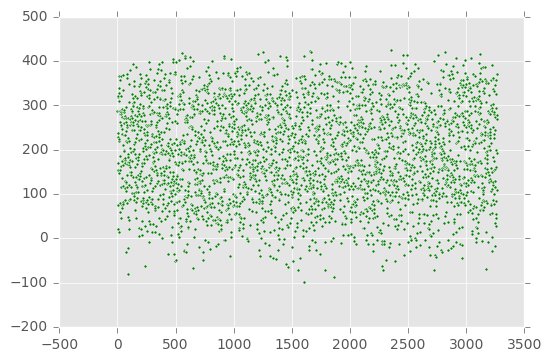

In [140]:
plt.scatter(X_test.reset_index(drop=True).index, model.predict(X_test).tolist(), c='g', marker='.')

## RidgeCV

In [141]:
model = linear_model.RidgeCV(cv=5, normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.32448951037451434

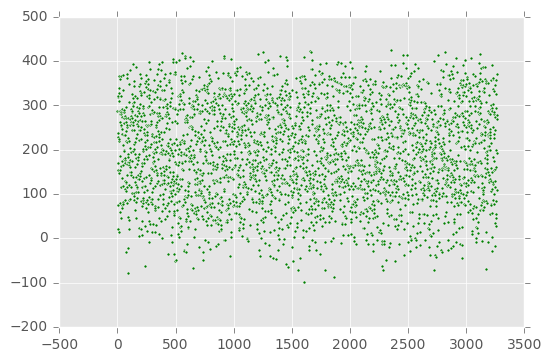

In [142]:
plt.scatter(X_test.reset_index(drop=True).index, model.predict(X_test).tolist(), c='g', marker='.')